In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from numpy import * ;
import pandas as pd
import numpy as np
import scipy.linalg
import os
def load_csv(path):
    data_read = pd.read_csv(path)
    list = data_read.values.tolist()
    data = np.array(list)
    print(data.shape)
    # print(data)
    return data




In [166]:
AFile = "randn_data_regression_A.csv"
BFile = "randn_data_regression_b.csv"
A = load_csv(AFile)
B = load_csv(BFile)
rows = A.shape[0]
cols = A.shape[1]
# 拓展矩阵第1列设置为1
A=mat(np.c_[np.ones((rows,1)),A])
rows = A.shape[0]
cols = A.shape[1]
B = mat(B)
print(A.shape)
print(B.shape)
#创建theta矩阵
theta = np.zeros((cols,1))
print(theta.shape)


(49, 500)
(49, 1)
(49, 501)
(49, 1)
(501, 1)


# 1)	方法一：解线性方程组计算得到线性回归模型的参数

#求解线性方程组求解方法
#一 python自带函数求解 
#报错 因为必须是 方阵, 也就是行数等于列数
#theta = scipy.linalg.solve(A,B)
#二 使用自己写的迭代法求解线性方程组的方法求解, 我是之前用matlab写的, 所以需要重新写 也必须是方阵?

#AX = b  https://blog.csdn.net/skj1995/article/details/90114611 可逆的判断

In [142]:


before = A.T * A
if (np.linalg.det(before)!=0):
    theta = before.I*A.T*B 
    #θ=(x^-1X)^-1X^Ty
    print(theta)
else:
    #可以看到A数据的组数比特征少
    print("矩阵不可逆,请采用梯度下降法")
    

矩阵不可逆,请采用梯度下降法


# 2)	方法二：利用梯度下降法计算线性回归模型的参数。

In [60]:
def gradientDescent(X, y, theta, learning_rate, num_iters, tol,print_step):
    #参数说明: X数据, y预测目标值, theta参数,learinig_rate 学习率  num_iters迭代次数 tol精度(0.01)
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        n = len(theta)
        theta_temp = theta
        for j in range(n):
            theta_temp[j] = theta[j] - learning_rate/m*(X*theta-y).T*X[:,j];
        theta = theta_temp 
        cost = computeCost(X, y, theta)
        J_history[i] = cost
        if(i%print_step==0):
            print('第%d次迭代, cost = %f' %(i,cost))
        if(cost < tol):
            print('迭代训练结束,迭代次数:%d, 偏差值cost=%f'%(i,cost))
            return (theta,J_history)
    
    return (theta,J_history)

In [61]:
#计算偏差值
def computeCost(X,y,theta):
    # 这里均方误(欧式距离)差求偏差
    m = len(y) #number of training examples
    
    inner = np.power(((X * theta) - y), 2) # (pred - y)^2
    
    return np.sum(inner) / (2 * m)
    

In [66]:
# 这里是求解 方法二

# 第一部分: 设定传入参数
n = rows
m = cols
X0 = theta

A = A
B = B
theta = np.zeros((m,1))
learning_rate = 0.01
step = 2000
tol = 0.001
print_step = 10

#不可逆还可以使用加正则化项来做, 先写梯度下降方法吧

# 第二部分: 梯度下降方法
(theta,J_hist) = gradientDescent(A,B,theta,learning_rate,step,tol,print_step)
#print(theta)

第0次迭代, cost = 243.768989
第10次迭代, cost = 44.050490
第20次迭代, cost = 10.552179
第30次迭代, cost = 2.902350
第40次迭代, cost = 0.855970
第50次迭代, cost = 0.262709
第60次迭代, cost = 0.082717
第70次迭代, cost = 0.026514
第80次迭代, cost = 0.008612
第90次迭代, cost = 0.002826
第100次迭代, cost = 0.000935
迭代训练结束,迭代次数:100, 偏差值cost=0.000935


In [75]:
print(theta)

[[ 2.04634351e-01]
 [ 1.62400894e-02]
 [ 9.29961461e-02]
 [ 6.73010774e-02]
 [ 7.30270308e-01]
 [ 8.61464231e-01]
 [-3.06918121e-01]
 [-8.99312104e-03]
 [ 7.95697883e-01]
 [ 4.17147141e-01]
 [-6.30807306e-01]
 [-9.53032181e-02]
 [ 2.89267106e-01]
 [ 6.69853466e-01]
 [-2.12305784e-02]
 [ 4.93088308e-01]
 [ 1.35576311e-01]
 [-2.74558161e-01]
 [ 4.94648693e-01]
 [-4.59965800e-02]
 [ 6.08435859e-01]
 [ 4.86572210e-01]
 [ 8.08605003e-01]
 [ 7.12989582e-01]
 [-3.02549774e-01]
 [-8.31883374e-02]
 [ 1.55373770e-01]
 [ 7.16539711e-01]
 [ 3.44417789e-01]
 [ 7.08536863e-01]
 [ 4.95973160e-01]
 [ 3.82168021e-01]
 [-3.13244724e-01]
 [ 1.22889921e+00]
 [ 1.86272622e-01]
 [ 2.08047527e-02]
 [ 5.42738922e-01]
 [ 4.23724920e-01]
 [ 8.12797121e-01]
 [ 6.98345100e-01]
 [ 9.15665448e-02]
 [ 2.68957265e-02]
 [ 2.75499784e-01]
 [ 9.40905345e-01]
 [ 4.76747893e-02]
 [ 7.14117737e-01]
 [ 6.47808839e-01]
 [ 8.01784937e-02]
 [ 8.12837739e-01]
 [ 7.32994728e-01]
 [ 1.64845760e-01]
 [ 2.69518667e-01]
 [-8.5360819

2000


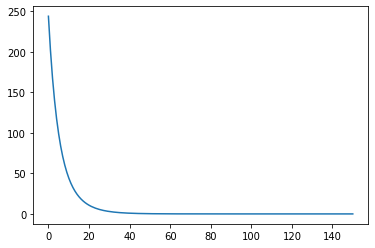

In [76]:
print(J_hist.size)

x_axis = np.linspace(0,150,150)
plt.plot(x_axis,J_hist[0:150])

# 3)	在线性回归模型中加入正则化项 ，实现计算过程。 

#正则化之后 对于 梯度下降法和 normalequation 正规方程方法算法都有所改变

#好处是对于梯度下降 可以避免guonihe

#对于normalequation 可以直接求出,不可逆的问题消失了 数学上的证明 比较高深..

#下面写求解
#先给出正规方程的求解
#再修改函数适应正则化



## 正规方程求解


In [128]:
Regularization_Parameter = 100


before = A.T * A+Regularization_Parameter*np.eye(cols)
print(before.size)
if (np.linalg.det(before)!=0):
    print('嘿嘿,加上就可逆了,瞬间求出,看看数量级基本相同参数位置和梯度下降方法求解的是一致的')
    theta = before.I*A.T*B 
    #θ=(x^-1X)^-1X^Ty
    print(theta)
    

251001
嘿嘿,加上就可逆了,瞬间求出,看看数量级基本相同参数位置和梯度下降方法求解的是一致的
[[ 1.67555831e-01]
 [ 1.46175195e-02]
 [ 7.20965336e-02]
 [ 6.65135545e-02]
 [ 5.67697138e-01]
 [ 6.79904898e-01]
 [-2.34303042e-01]
 [-2.30868803e-02]
 [ 6.29242502e-01]
 [ 3.03330175e-01]
 [-4.94058931e-01]
 [-5.41888241e-02]
 [ 1.92159122e-01]
 [ 4.99244977e-01]
 [-2.24109185e-02]
 [ 3.84054581e-01]
 [ 1.05943750e-01]
 [-2.19200806e-01]
 [ 3.83785603e-01]
 [-7.07126742e-02]
 [ 4.70979633e-01]
 [ 3.41743916e-01]
 [ 6.38267739e-01]
 [ 5.29331672e-01]
 [-2.51965499e-01]
 [-7.62135864e-02]
 [ 9.75018126e-02]
 [ 5.39397898e-01]
 [ 2.56357689e-01]
 [ 5.29367622e-01]
 [ 3.85564877e-01]
 [ 3.15662723e-01]
 [-2.02952710e-01]
 [ 9.59870453e-01]
 [ 1.58563998e-01]
 [-1.99937995e-02]
 [ 4.45363672e-01]
 [ 3.27571330e-01]
 [ 6.03582653e-01]
 [ 5.68254903e-01]
 [ 5.86329766e-02]
 [ 4.70873829e-02]
 [ 2.16539595e-01]
 [ 7.13162747e-01]
 [-7.67660422e-04]
 [ 5.46172125e-01]
 [ 5.25861277e-01]
 [ 7.61860113e-02]
 [ 6.53468050e-01]
 [ 5.55388398e-01]


## 梯度下降求解

In [88]:
#计算偏差值
def computeCostWithRegularization(X,y,theta,Regularization_Parameter):
    # 加正则化项的计算cost
    m = len(y) #number of training examples
    
    inner = np.power(((X * theta) - y), 2)+ Regularization_Parameter*sum(np.power(theta, 2))
    
    return np.sum(inner) / (2 * m)
    

In [114]:
def gradientDescentWithRegularization(X, y, theta, learning_rate, num_iters, tol,print_step,Regularization_Parameter):
    #参数说明: X数据, y预测目标值, theta参数,learinig_rate 学习率  num_iters迭代次数 tol精度(0.01)
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        n = len(theta)
        theta_temp = theta
        for j in range(n):
            theta_temp[j] = theta[j] - learning_rate/m*(X*theta-y).T*X[:,j];
        theta = theta_temp 
        cost = computeCostWithRegularization(X, y, theta,Regularization_Parameter)
        J_history[i] = cost
        if(i%print_step==0):
            print('第%d次迭代, cost = %f' %(i,cost))
        if((i>1) and (abs(J_history[i-1]-cost) < tol)):
            print(J_history[i-1]-cost)
            print(tol)
            print('迭代训练结束,迭代次数:%d, 偏差值cost=%f'%(i,cost))
            return (theta,J_history)
    
    return (theta,J_history)

In [116]:

A = A
B = B
theta = np.zeros((m,1))
learning_rate = 0.01
step = 2000
tol = 0.001
print_step = 10
Regularization_Parameter = 100
(theta,J_hist) = gradientDescentWithRegularization(A,B,theta,learning_rate,step,tol,print_step,Regularization_Parameter)

第0次迭代, cost = 270.030335
第10次迭代, cost = 1301.201020
第20次迭代, cost = 2273.823487
第30次迭代, cost = 2820.044454
第40次迭代, cost = 3111.455585
第50次迭代, cost = 3266.868856
第60次迭代, cost = 3350.442033
第70次迭代, cost = 3395.801613
第80次迭代, cost = 3420.633711
第90次迭代, cost = 3434.332484
第100次迭代, cost = 3441.940282
第110次迭代, cost = 3446.190101
第120次迭代, cost = 3448.576202
第130次迭代, cost = 3449.921854
第140次迭代, cost = 3450.683693
第150次迭代, cost = 3451.116481
第160次迭代, cost = 3451.363083
第170次迭代, cost = 3451.503972
第180次迭代, cost = 3451.584658
第190次迭代, cost = 3451.630965
第200次迭代, cost = 3451.657592
第210次迭代, cost = 3451.672930
[-0.00094901]
0.001
迭代训练结束,迭代次数:214, 偏差值cost=3451.677060


In [92]:
print(theta)


[[ 2.04669171e-01]
 [ 1.60765702e-02]
 [ 9.30660330e-02]
 [ 6.70146276e-02]
 [ 7.30890709e-01]
 [ 8.61995685e-01]
 [-3.07409945e-01]
 [-8.82881026e-03]
 [ 7.95877364e-01]
 [ 4.18309472e-01]
 [-6.31432282e-01]
 [-9.57050955e-02]
 [ 2.90687553e-01]
 [ 6.71064809e-01]
 [-2.11533694e-02]
 [ 4.93908726e-01]
 [ 1.35924049e-01]
 [-2.74997037e-01]
 [ 4.95204467e-01]
 [-4.48403787e-02]
 [ 6.08958458e-01]
 [ 4.88074430e-01]
 [ 8.09722526e-01]
 [ 7.14447558e-01]
 [-3.02394013e-01]
 [-8.29142063e-02]
 [ 1.56319169e-01]
 [ 7.17370375e-01]
 [ 3.45037689e-01]
 [ 7.10569725e-01]
 [ 4.96844394e-01]
 [ 3.81603923e-01]
 [-3.15128550e-01]
 [ 1.23027981e+00]
 [ 1.86205390e-01]
 [ 2.23721112e-02]
 [ 5.42321318e-01]
 [ 4.24468717e-01]
 [ 8.14640149e-01]
 [ 6.98320002e-01]
 [ 9.18819547e-02]
 [ 2.64530245e-02]
 [ 2.75271431e-01]
 [ 9.42916746e-01]
 [ 4.88885922e-02]
 [ 7.15306003e-01]
 [ 6.47160595e-01]
 [ 7.94081671e-02]
 [ 8.13818077e-01]
 [ 7.33945314e-01]
 [ 1.65132536e-01]
 [ 2.69857437e-01]
 [-8.6290840

2000


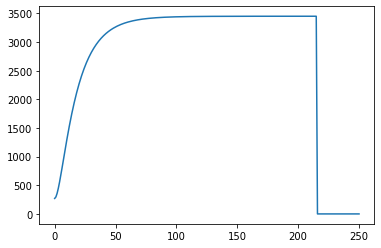

In [117]:

print(J_hist.size)
x_axis = np.linspace(0,250,250)
plt.plot(x_axis,J_hist[0:250])

# 2.	对randn_data_regression_A的某一列乘上一个很大的数（比如100000），再调用梯度下降法计算线性回归模型的参数，你有什么发现？你觉得如何处理才有可能降低梯度下降法的迭代步数？

In [171]:

# 这里是求解 方法二

# 第一部分: 设定传入参数
n = rows
m = cols
X0 = theta

A1 = np.array(A, copy=True)
A1[:,2] = A1[:,2]*100
A1 = mat(A1)
print(A)
print(A1)

[[ 1.         -1.66558438  0.61446305 ... -0.1933223  -0.02022444
  -1.27698055]
 [ 1.          0.12533231  0.50774078 ...  0.07251873 -0.7443348
   1.05665513]
 [ 1.          0.28767642  1.69242987 ...  0.94838331  0.16651915
   0.3859412 ]
 ...
 [ 1.         -0.92190162  0.56896065 ... -1.47215039  0.31523604
  -0.05946208]
 [ 1.         -2.17067449 -0.82171429 ... -1.40166474  2.57047553
  -2.09209424]
 [ 1.         -0.05918782 -0.26560685 ...  1.03986473 -0.26376483
  -1.36321714]]
[[ 1.00000000e+00 -1.66558438e+00  6.14463049e+01 ... -1.93322299e-01
  -2.02244400e-02 -1.27698055e+00]
 [ 1.00000000e+00  1.25332306e-01  5.07740785e+01 ...  7.25187290e-02
  -7.44334802e-01  1.05665513e+00]
 [ 1.00000000e+00  2.87676420e-01  1.69242987e+02 ...  9.48383307e-01
   1.66519145e-01  3.85941200e-01]
 ...
 [ 1.00000000e+00 -9.21901624e-01  5.68960646e+01 ... -1.47215039e+00
   3.15236043e-01 -5.94620760e-02]
 [ 1.00000000e+00 -2.17067449e+00 -8.21714292e+01 ... -1.40166474e+00
   2.57047553e

In [176]:

B = B
theta = np.zeros((m,1))
learning_rate = 0.0001
step = 2000
tol = 0.001
print_step = 10

# 梯度下降方法
(theta,J_hist) = gradientDescent(A1,B,theta,learning_rate,step,tol,print_step)
#print(theta)

第0次迭代, cost = 295.007370
第10次迭代, cost = 289.191489
第20次迭代, cost = 283.607188
第30次迭代, cost = 278.144330
第40次迭代, cost = 272.800008
第50次迭代, cost = 267.571393
第60次迭代, cost = 262.455724
第70次迭代, cost = 257.450313
第80次迭代, cost = 252.552541
第90次迭代, cost = 247.759855
第100次迭代, cost = 243.069768
第110次迭代, cost = 238.479855
第120次迭代, cost = 233.987754
第130次迭代, cost = 229.591162
第140次迭代, cost = 225.287836
第150次迭代, cost = 221.075587
第160次迭代, cost = 216.952284
第170次迭代, cost = 212.915848
第180次迭代, cost = 208.964255
第190次迭代, cost = 205.095528
第200次迭代, cost = 201.307743
第210次迭代, cost = 197.599023
第220次迭代, cost = 193.967538
第230次迭代, cost = 190.411504
第240次迭代, cost = 186.929182
第250次迭代, cost = 183.518876
第260次迭代, cost = 180.178931
第270次迭代, cost = 176.907736
第280次迭代, cost = 173.703718
第290次迭代, cost = 170.565343
第300次迭代, cost = 167.491115
第310次迭代, cost = 164.479577
第320次迭代, cost = 161.529305
第330次迭代, cost = 158.638912
第340次迭代, cost = 155.807044
第350次迭代, cost = 153.032382
第360次迭代, cost = 150.313638
第370次迭代, cos

for line in locals()['In']:
    print(line)
    
后面的都是草稿, 还有一定价值,没删除

In [ ]:
#function [X,err,iter] = Gauss_S(A,X0,b,n,step,tol)
            #迭代法求解好像必须是n*n型的正定?
def jacobi(X,Y,tol,step):
    n = X.shape[1] # 获取维度 python操作
    m = X.shape[0]
    print('m row =',m)
    print('n col =',n)
    theta0 = np.zeros(n)# 创建0向量
    theta  = np.zeros(n)
    print('step =',step)
    for i in range(int(step)):
        err = 0
#         print('i=',i)
        for j in range(m):
            theta[j] = (Y[j]-X[j].dot(theta0)+X[j,j]*theta0[j])/X[j,j]
        theta0 = theta
        
        err = np.linalg.norm(X.dot(theta)-Y)
        if(err < tol):
            print("迭代训练结束,迭代次数:"+i+", 偏差值:"+err)
    return (theta,err)
        

In [ ]:

(theta,err) = jacobi(A,B,tol,step)

In [ ]:
print(A[1].size)
print(A[1,1].size)
print(A[1,:].size)
print(X0[1].size)
print(X0.size)

In [ ]:

    print(A.dot(X0))

In [ ]:
# 草稿部分 
#def jacobi(A,B,sigma,N):
#     n = len(A)
#     x0 = []
#     x = []
#     for i in range(0,n):
#         x0.append(0)
#         x.append(0)
#     for k in range(1,N+1):
#         R = 0
#         for i in range(0,n):
#             sum_ax = 0
#             for j in range(0,n):
#                 sum_ax = sum_ax + A[i][j] * x0[j]
#             x[i] = x0[i] + ((B[i] - sum_ax)/A[i][i])
#             if abs(x[i] - x0[i]) > R:
#                 R = abs(x[i] - x0[i])
#         if R <= sigma:
#             print("精确度等于",sigma,"时，jacobi迭代法需要迭代",k,"次收敛")
#             return (x,k)
#         for i in range(0,n):
#             x0[i] = x[i]
#     return (x,k)
# def Jacobi(A,X0,B,n,step,tol):
#     theta = X0
#     for i in range(step):
#         error=0
#         for j in range(n):
#             theta[j] = (B[j]-A[j,:]*X0+A[j,j]*X0[j])/A[j,j]
# #             print(theta[j])
# #             print(A[j,j])
#         X0 = theta
#         err = np.linalg.norm(A*theta-B-0)
#         if(err < tol):
#             print("迭代次数:"+i+", 偏差值:"+err)
# #AX = b Xθ=Y
# # def = jacobi(A,B,tol,step):
# #     n = A.ndim
# #     theta0 = np.zeros(n)
# #     theta  = np.zeros(n)
# #     for i in range(step):
# #         err = 0
# #         print('i=',i)
# #         for j in range(n):
# #             theta[j] = (B[j]-A[j].dot(theta0)+A[j,j]*theta0[j])/A[j,j]

# #         err = np.linalg.norm(A*theta-B-0)

        
            
        
# def jacobi(a,b,c=0.0001,d=30):
#     x1=np.zeros(a.shape[1])
#     x2=np.zeros(a.shape[1])
#     k=0
#     while k<d:
#         k=k+1
#         print('k=',k)
#         for i in range(a.shape[1]):
#             x2[i]=(-a[i].dot(x1)+b[i]+a[i,i]*x1[i])/a[i,i]
#         if np.max(np.abs(x2-x1))<=c:
#             print("x%d=" % k,x2)
#             print(np.max(np.abs(x2-x1)))
#             break
#         print("x%d=" % k,x2)
#         x1=x2.copy()
#     return x2

# def gauss_seidel(A,B,sigma,N):
#     n = len(A)
#     x0 = []
#     x = []
#     for i in range(0,n):
#         x0.append(0)
#         x.append(0)
#     for k in range(1,N+1):
#         R = 0
#         for i in range(0,n):
#             sum_ax = 0
#             for j in range(0,n):
#                 if j >= i:
#                     sum_ax = sum_ax + A[i][j] * x0[j]
#                 else:
#                     sum_ax = sum_ax + A[i][j] * x[j]
#             x[i] = x0[i] + ((B[i] - sum_ax)/A[i][i])
#             if abs(x[i] - x0[i]) > R:
#                 R = abs(x[i] - x0[i])
#         if R <= sigma:
#             print("精确度等于",sigma,"时，gauss_seidel迭代法需要迭代",k,"次收敛")
#             return (x,k)
#         for i in range(0,n):
#             x0[i] = x[i]
#     return (x,k)
